<a href="https://colab.research.google.com/github/corleonesado/SadettinEr_DSA210_FallProject/blob/main/EDA_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA AND VISUALISATION

We first perform exploratory data analysis to understand the behavior of forex and crypto price movements after news events. Summary statistics, distributions, correlations, and time-based patterns are included.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
sns.set_theme()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
ff_path = "/content/drive/MyDrive/forexfactory_with_pct_change.csv"
crypto_path = "/content/drive/MyDrive/final_crypto_news.csv"

ff = pd.read_csv(ff_path)
crypto = pd.read_csv(crypto_path)

print("Forex dataset loaded with shape:", ff.shape)
print("Crypto dataset loaded with shape:", crypto.shape)

Forex dataset loaded with shape: (261, 12)
Crypto dataset loaded with shape: (474, 7)


## Summary Statistics

We begin by examining the distribution of percentage price changes across both datasets.


In [9]:
print("\nForex Columns:", ff.columns.tolist())
print("Crypto Columns:", crypto.columns.tolist())

print("\nForex info:")
ff.info()
print("\nCrypto info:")
crypto.info()

print("\nMissing values (Forex):")
print(ff.isna().sum())

print("\nMissing values (Crypto):")
print(crypto.isna().sum())

print("\nForex descriptive stats:")
display(ff.describe())

print("\nCrypto descriptive stats:")
display(crypto.describe())



Forex Columns: ['event_id', 'date', 'time', 'currency', 'event', 'actual', 'forecast', 'previous', 'price_before', 'price_after', 'pct_change', 'pair']
Crypto Columns: ['Date (GMT+3)', 'from', 'Text', 'pair', '5m_before', '5m_after', 'pct_change']

Forex info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   event_id      261 non-null    int64  
 1   date          261 non-null    object 
 2   time          261 non-null    object 
 3   currency      261 non-null    object 
 4   event         261 non-null    object 
 5   actual        261 non-null    object 
 6   forecast      255 non-null    object 
 7   previous      261 non-null    object 
 8   price_before  261 non-null    float64
 9   price_after   261 non-null    float64
 10  pct_change    261 non-null    float64
 11  pair          261 non-null    object 
dtypes: float64(3), int64(1), o

,event_id,price_before,price_after,pct_change
count,261.000000,261.000000,261.000000,261.000000
mean,143041.636015,1554.512201,1555.628381,0.029757
std,1759.675650,1772.101446,1773.387031,0.219906
min,140686.000000,0.562650,0.563570,-0.662700
25%,141627.000000,1.176640,1.176040,-0.064100
50%,142625.000000,1.400540,1.398220,0.012800
75%,144089.000000,3366.318000,3368.615000,0.101100
max,150951.000000,4165.035000,4158.725000,0.929400



Crypto descriptive stats:


,5m_before,5m_after,pct_change
count,474.000000,474.000000,474.000000
mean,63229.633004,63226.139755,0.003143
std,50363.597709,50355.728586,0.367674
min,0.158740,0.158940,-5.087502
25%,181.505000,181.160000,-0.124608
50%,92519.550000,92426.550000,0.019519
75%,105074.025000,104885.350000,0.156070
max,123650.300000,123660.100000,1.165926


## Distribution of % Price Change

The histogram below shows how forex prices react immediately after high-impact news releases.


Text(0, 0.5, 'Count')

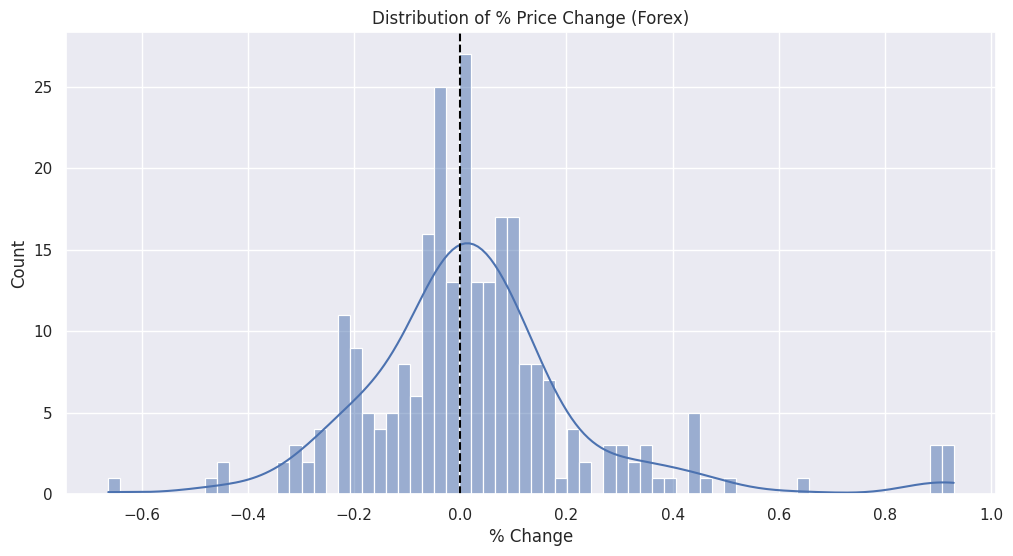

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(ff["pct_change"], bins=70, kde=True)
plt.title("Distribution of % Price Change (Forex)")
plt.axvline(0, color="black", linestyle="--")
plt.xlabel("% Change")
plt.ylabel("Count")

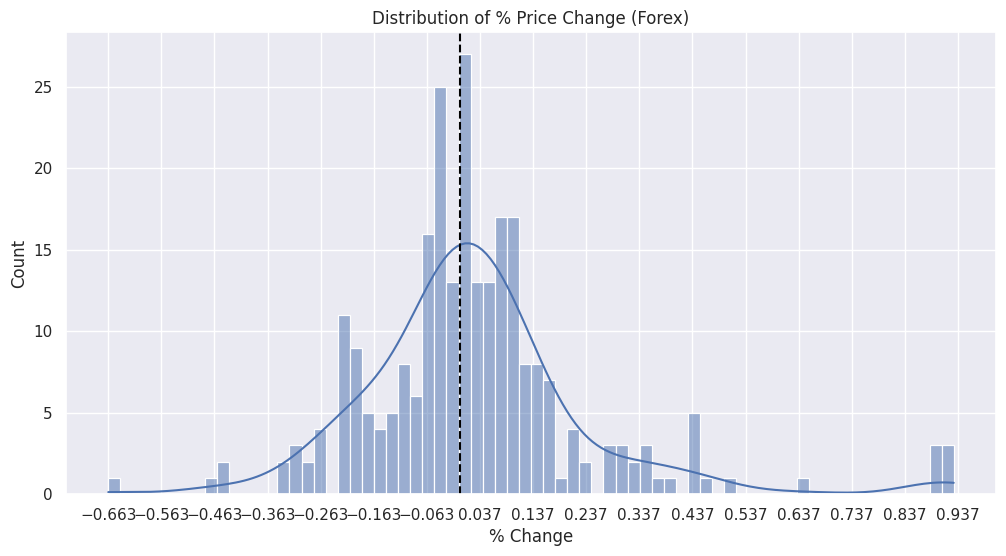

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(ff["pct_change"], bins=70, kde=True)
plt.title("Distribution of % Price Change (Forex)")
plt.axvline(0, color="black", linestyle="--")
plt.xlabel("% Change")
plt.ylabel("Count")
plt.xticks(np.arange(ff["pct_change"].min(),
                     ff["pct_change"].max()+0.05,
                     0.1))
plt.show()

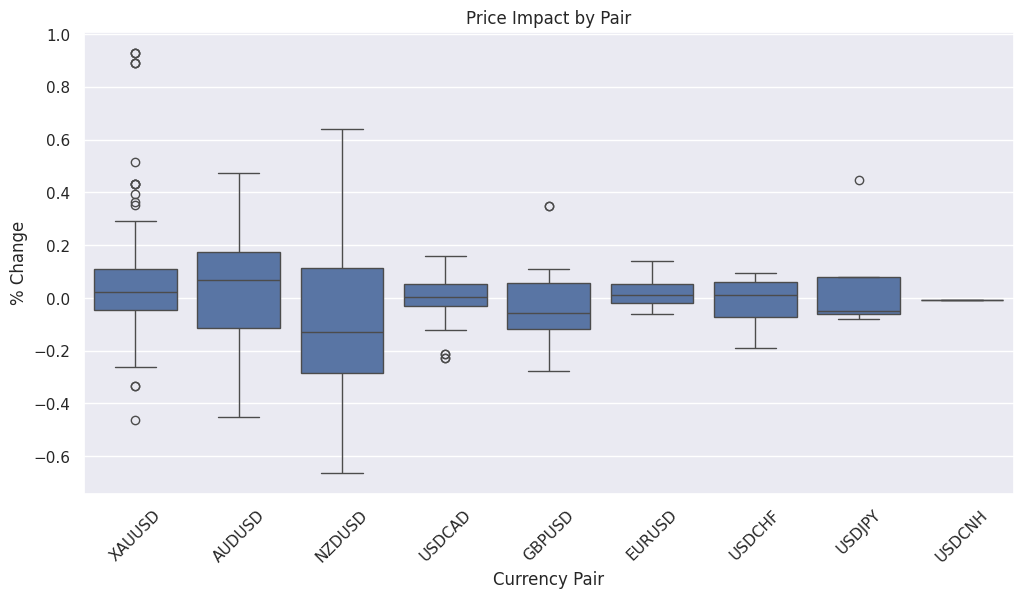

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=ff, x="pair", y="pct_change")
plt.title("Price Impact by Pair")
plt.xlabel("Currency Pair")
plt.ylabel("% Change")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1476074628.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ff["hour"] = pd.to_datetime(ff["time"]).dt.hour


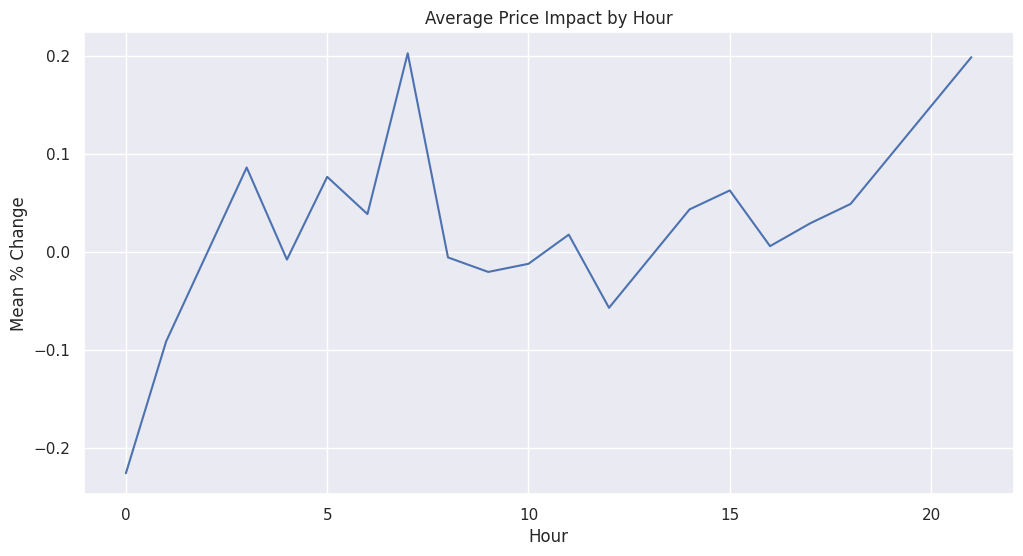

In [18]:
ff["hour"] = pd.to_datetime(ff["time"]).dt.hour

plt.figure(figsize=(12,6))
ff.groupby("hour")["pct_change"].mean().plot(kind="line")
plt.title("Average Price Impact by Hour")
plt.xlabel("Hour")
plt.ylabel("Mean % Change")
plt.grid(True)
plt.show()

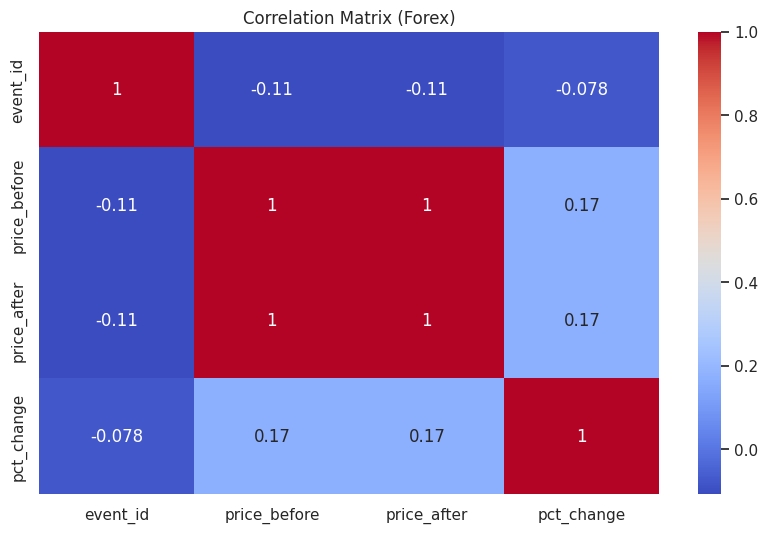

In [19]:
numeric_ff = ff.select_dtypes(include=['float64','int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_ff.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Forex)")
plt.show()

## Distribution of Price Impact (Crypto)

The histogram below shows how crypto prices react immediately after high-impact news releases.


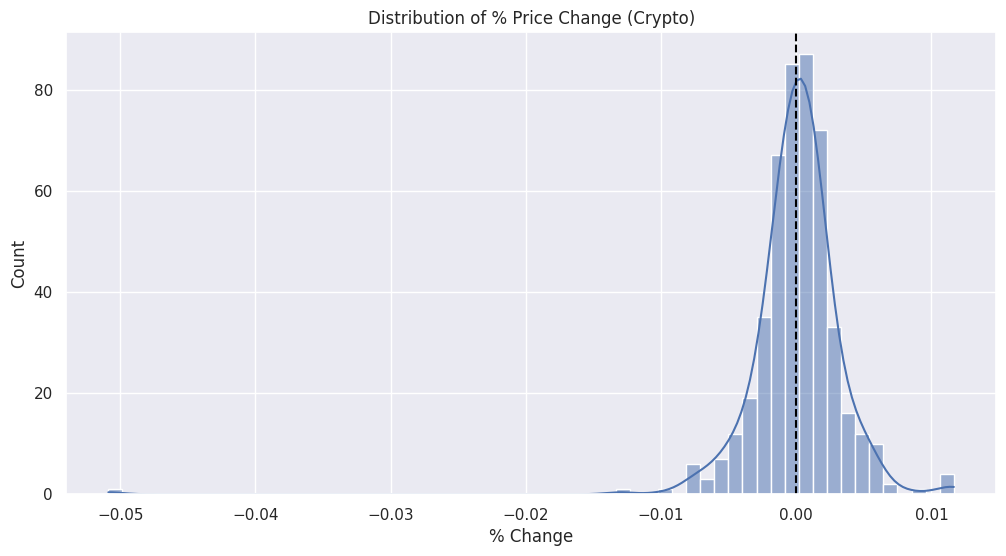

In [21]:
if "5m_before" in crypto.columns and "5m_after" in crypto.columns:
    crypto["pct_change"] = (crypto["5m_after"] - crypto["5m_before"]) / crypto["5m_before"]

    plt.figure(figsize=(12,6))
    sns.histplot(crypto["pct_change"], bins=60, kde=True)
    plt.title("Distribution of % Price Change (Crypto)")
    plt.axvline(0, color="black", linestyle="--")
    plt.xlabel("% Change")
    plt.ylabel("Count")
    plt.show()

## Crypto Price Impact by Coin

The boxplot shows how different cryptocurrencies react to news events.


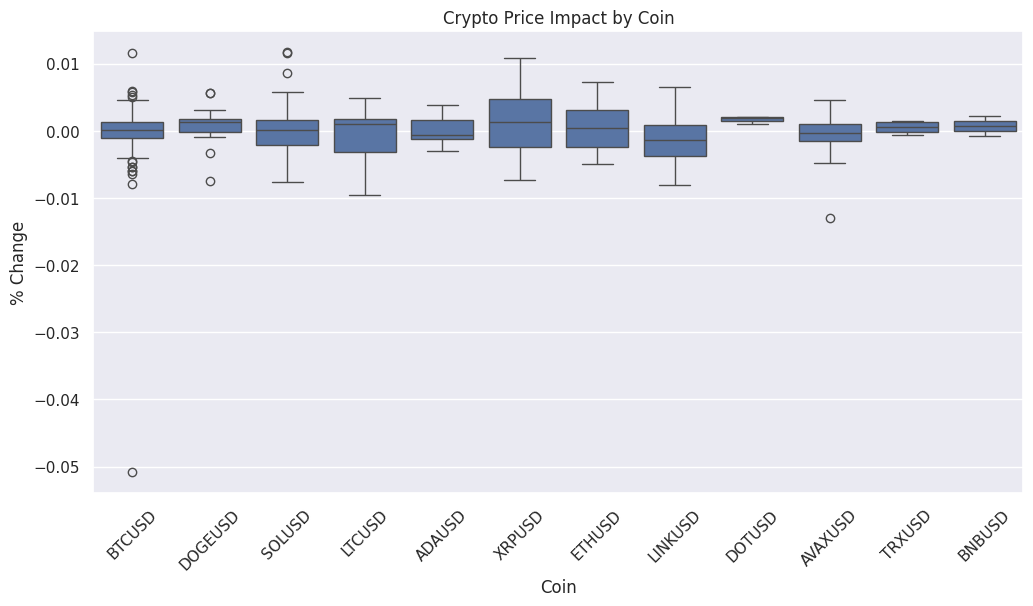

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=crypto, x="pair", y="pct_change")
plt.xticks(rotation=45)
plt.title("Crypto Price Impact by Coin")
plt.xlabel("Coin")
plt.ylabel("% Change")
plt.show()


In [23]:
crypto.groupby("pair")["pct_change"].agg(["mean","std","count"]).sort_values("std", ascending=False)


,mean,std,count
pair,,,
AVAXUSD,-0.001384,0.005418,8
XRPUSD,0.001165,0.004672,17
LTCUSD,-0.001023,0.004635,9
BTCUSD,-0.000010,0.003660,292
SOLUSD,0.000026,0.003616,76
ETHUSD,0.000688,0.003579,26
LINKUSD,-0.001194,0.003461,16
DOGEUSD,0.000702,0.003456,13
ADAUSD,-0.000026,0.002358,8


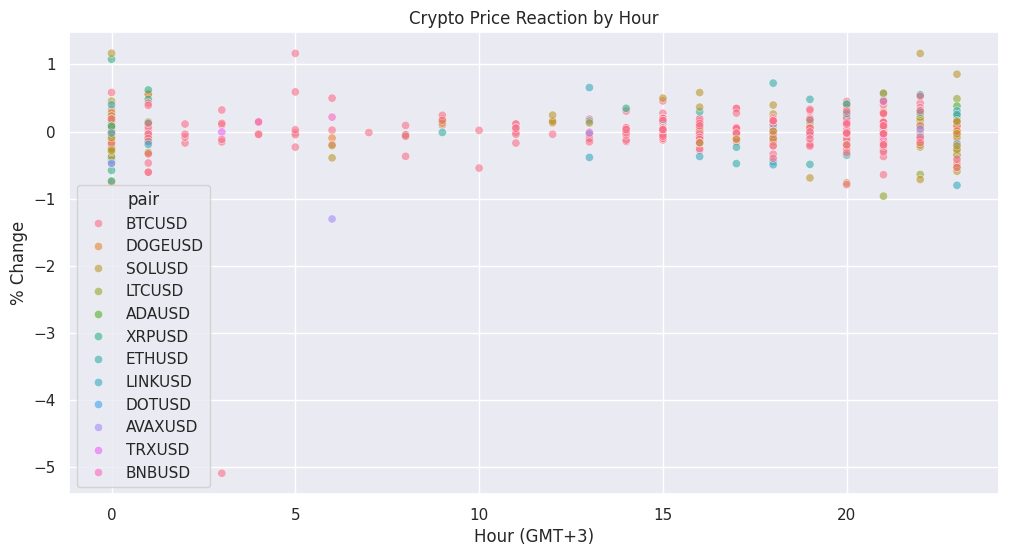

In [29]:
crypto["hour"] = pd.to_datetime(crypto["Date (GMT+3)"], errors="coerce").dt.hour
plt.figure(figsize=(12,6))
sns.scatterplot(data=crypto, x="hour", y="pct_change", hue="pair", alpha=0.6)
plt.title("Crypto Price Reaction by Hour")
plt.xlabel("Hour (GMT+3)")
plt.ylabel("% Change")
plt.show()


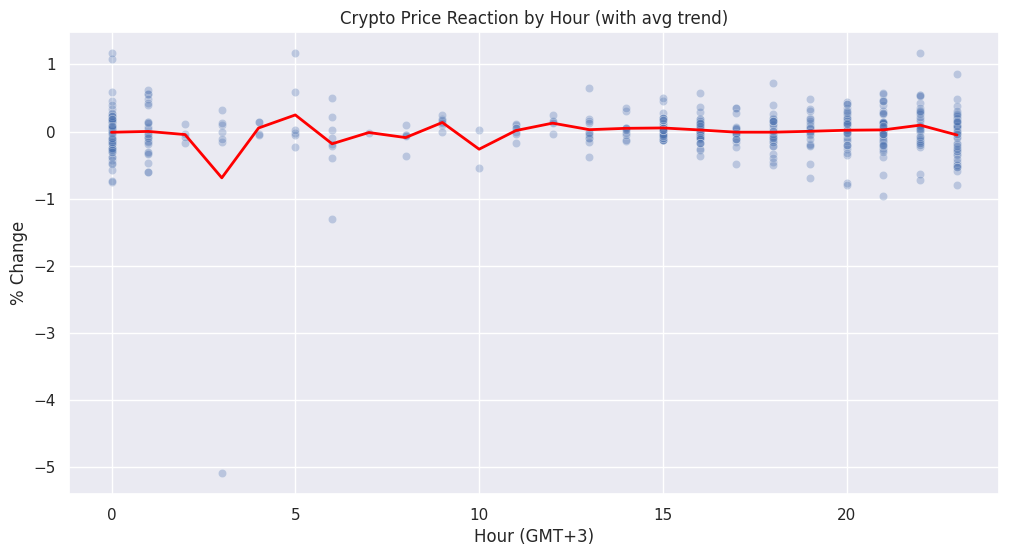

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=crypto, x="hour", y="pct_change", alpha=0.3)

crypto_hourly = crypto.groupby("hour")["pct_change"].mean()
plt.plot(crypto_hourly.index, crypto_hourly.values, color="red", linewidth=2)

plt.title("Crypto Price Reaction by Hour (with avg trend)")
plt.xlabel("Hour (GMT+3)")
plt.ylabel("% Change")
plt.show()
